## <center> PlotlyJS.image </center>

PlotlyJS docs, [https://github.com/plotly/plotlyjs.jl-docs/tree/master/julia](https://github.com/plotly/plotlyjs.jl-docs/tree/master/julia),
do not contain any example of plot involving the trace `image`. Tha's why we discuss here how this trace can be defined.

In [3]:
using PlotlyJS, Base64

The interrogation:

In [ ]:
?PlotlyJS.image

returns two methods for this function. The first method, `image(; kwargs...)` is designated to display a digital image (png, jpg, tiff/tif, ...), while the second one, to display an  `Array(UInt8, 3)` as image.
We discuss here the first method. The second one is presented in  [https://github.com/empet/PlotlyJS-image-tutorials/blob/main/1p-Image-from-ArrayUInt8.ipynb](https://github.com/empet/PlotlyJS-image-tutorials/blob/main/1p-Image-from-ArrayUInt8.ipynb).

Inspecting the reference 
[https://plotly.com/julia/reference/image/](https://plotly.com/julia/reference/image/) we notice that the   most important keyword, in the first method is  the image `source`, described as: 
```
Parent: data[type=image]
Type: string
Specifies the data URI of the image to be visualized. The URI consists of "data:image/[<media subtype>][;base64],<data>"
```     

`JuliaImages` offers many possibilities to display an image, but creating a plot 
with `PlotlyJS.image`, as trace, allows to associate the image title, to add axes ticks and labels,
annotations, and moreover we can flip between a list(vector) of images, selected from a dropdown menu or  display a sequence of images with an attached slider.

Before creating a plot from an image, we have  to encode that image as a Base64 string, using a the function `bs64string`, with two methods:

In [4]:
bs64string(data::AbstractVector) = "data:image/png;base64,"*base64encode(data)
bs64string(img::AbstractMatrix)="data:image/png;base64,$(stringmime(MIME("image/png"), img))" 

bs64string (generic function with 2 methods)

The first method will be called when the image is read, with  `Base.read("imgfile.ext")`, that returns a `Vector{UInt8}`,
while the second one, when the image is loaded as a `Matrix{RGB{T}}` or 
a `Matrix{RGBA{T}}`, via `img=Images.load("imgfile.ext").
The image file can have ext = `png`, `jpg`, `tiff`, etc.  To read a `webp` image, use `read("imagefile.webp")`, because `Images.load` does not accept `webp` files.
The first method is much more performant than the second one.

### Display an image with title and annotation

data: [
  "image with fields source and type"
]

layout: "layout with fields annotations, font, height, margin, shapes, template, title, and width"
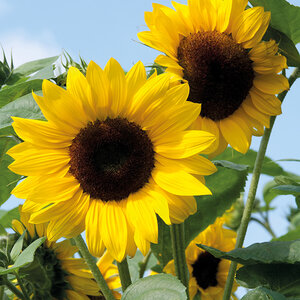

In [5]:
img = read("images/sun-flower.jpg")
fig1 = Plot(PlotlyJS.image(;source=bs64string(img)), Layout(width=400, height=400, 
           title_text="<b>Sunflower</b>", title_x=0.5, font_family="Balto"));
#add annotations and a shape (here a white vertical line)
relayout!(fig1, annotations = [attr(
        font_size=16, 
        font_color="RoyalBlue",
        showarrow=false,
        text="<b>Blue ciel</b>",
        x=50, y=30, #text position
        xref="x",
        yref="y",
        xanchor="center",
        yanchor="bottom",
    )])
add_shape!(fig1,  #add a white line
    line(x0=258, y0=168,
         x1=258, y1=244,
         line_color="white", 
         line_width=4))
display(fig1) 

The original image can be saved with added elements, via PlotlyJS:

In [ ]:
#savefig(fig1, "images/annotated-image.jpeg", width=400, height=400, scale=1)

### Display a webp image and use modebar drawing tools to draw free shapes

Let us try to display a webp image (as far as I know Python px.imshow cannot display this image type), and add drawing buttons to modebar. To draw   rectangles for example, set in layout, `dragmode="drawrect"`, and to change the drawing tool  click on the corresponding button in modebar: 

In [ ]:
vecuint8 = read("images/test-image.webp") #https://developers.google.com/speed/webp/gallery1
fig2 = Plot(PlotlyJS.image(;source=bs64string(vecuint8)), 
            Layout(width=500, height=500, title_text="<b>Webp image</b>", 
                   title_x=0.5, font_family="Balto", dragmode="drawrect"),
            config = PlotConfig(modeBarButtonsToAdd=[
                                   "drawline",
                                   "drawopenpath",
                                   "drawclosedpath",
                                   "drawcircle",
                                   "drawrect",
                                   "eraseshape"
]))

Hence we can add shape to the image either to an exact position (fig1) or at approximate
position, with the drawing tool (fig2).